<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

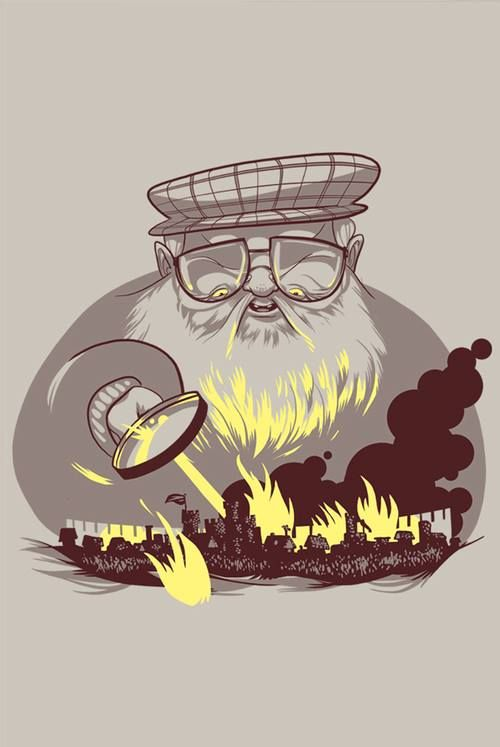

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 49.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 58.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data_train = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")

data_train.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [5]:
data_train['title'].fillna("", inplace=True)
data_train['culture'].fillna("", inplace=True)
data_train['spouse'].fillna("", inplace=True)
data_train['isAliveSpouse'].fillna(3.0, inplace=True)
data_train['age'].fillna(9999, inplace=True)
data_train['ageIsNa'] = data_train['age'].isna().astype(int)

# Слишком много null значений
data_train.drop(columns=[
    'mother',
    'father',
    'heir',
    'isAliveMother',
    'isAliveFather',
    'isAliveHeir'],
          inplace=True)

# Числовоый признаки не получится заполнить
data_train.drop(columns=[
    'dateOfBirth',
    # 'age'
],
                inplace=True)

<ipython-input-5-ce61fc09645e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['title'].fillna("", inplace=True)
<ipython-input-5-ce61fc09645e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [6]:
data_test['title'].fillna("", inplace=True)
data_test['culture'].fillna("", inplace=True)
data_test['spouse'].fillna("", inplace=True)
data_test['isAliveSpouse'].fillna(3.0, inplace=True)
data_test['age'].fillna(9999, inplace=True)
data_test['ageIsNa'] = data_test['age'].isna().astype(int)

# Слишком много null значений
data_test.drop(columns=[
    'mother',
    'father',
    'heir',
    'isAliveMother',
    'isAliveFather',
    'isAliveHeir'],
          inplace=True)

# Числовоый признаки не получится заполнить
data_test.drop(columns=[
    'dateOfBirth',
    # 'age'
],
                inplace=True)

<ipython-input-6-05eed093967c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['title'].fillna("", inplace=True)
<ipython-input-6-05eed093967c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           1557 non-null   object 
 4   house             1176 non-null   object 
 5   spouse            1557 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isAliveSpouse     1557 non-null   float64
 12  isMarried         1557 non-null   int64  
 13  isNoble           1557 non-null   int64  
 14  age               1557 non-null   float64
 15  numDeadRelations  1557 non-null   int64  
 16  popularity        1557 non-null   float64
 17  

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [8]:
data_train['isPopular'] = (data_train['popularity'] > 0.5).astype(int)
data_train['boolDeadRelations'] = (data_train['numDeadRelations'] > 0).astype(int)
# data_train.drop(columns=['popularity', 'numDeadRelations'], inplace = True)

data_test['isPopular'] = (data_test['popularity'] > 0.5).astype(int)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)
# data_test.drop(columns=['popularity', 'numDeadRelations'], inplace = True)

In [9]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Valemen': ['valemen', 'vale'],
    'Lhazareen': ['lhazareen', 'lhazarene'],
    'Ironborn': ['ironborn']
}

In [10]:
def change_cult(cultule_value):
  for key, value in cult.items():
    if cultule_value.lower().strip() in value:
      return key
  return cultule_value.capitalize()

In [11]:
data_train['culture'] = [change_cult(value) for value in data_train['culture']]
data_test['culture'] = [change_cult(value) for value in data_test['culture']]

In [12]:
data_train['culture'].value_counts()

,count
culture,
,1069
Northmen,103
Ironborn,92
Free Folk,56
Braavosi,40
Valyrian,28
Dornish,21
Ghiscari,18
Dothraki,17


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [13]:
data_train.columns

Index(['name', 'title', 'male', 'culture', 'house', 'spouse', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveSpouse', 'isMarried', 'isNoble',
       'age', 'numDeadRelations', 'popularity', 'isAlive', 'ageIsNa',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

In [14]:
# удалим колонку с именами персонажей
data_train.drop(columns=['name'], inplace = True)
data_test.drop(columns=['name'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [15]:
data_train["isAlive"].value_counts()

,count
isAlive,
1,1212
0,345


In [16]:
# целевой признак - категориальный
# датасет не сбалансирован, нулевых значений сильно меньше единичных

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

Титулы:

In [17]:
data_train['title'].value_counts()

,count
title,
,840
Ser,306
Maester,29
Archmaester,21
Lord,19
...,...
Lord of Greyshield,1
Lord of the Crossing,1
Felwood,1


In [18]:
print(f"Количество титулов, которые встречаются только один раз - {(data_train['title'].value_counts() == 1).sum():.2f}")
print(f"Количество титулов, которые встречаются больше одного раза - {(data_train['title'].value_counts() > 1).sum():.2f}")
print(f"Количество титулов, которы встречаются больше 10 раз - {(data_train['title'].value_counts() > 10).sum():.2f}")

Количество титулов, которые встречаются только один раз - 139.00
Количество титулов, которые встречаются больше одного раза - 57.00
Количество титулов, которы встречаются больше 10 раз - 7.00


In [19]:
# Распределение данных по персонажам с разными титулами не равномерно, объединим все титулы которые встречаются меньше 10 раз в один - other

In [20]:
data_train.loc[~(data_train['title'].isin(data_train['title'].value_counts()[(data_train['title'].value_counts() >= 10)].index)), 'title'] = 'other'
data_test.loc[~(data_test['title'].isin(data_train['title'].value_counts()[(data_train['title'].value_counts() >= 10)].index)), 'title'] = 'other'

In [21]:
data_train['title'].value_counts()

,count
title,
,840
Ser,306
other,301
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10


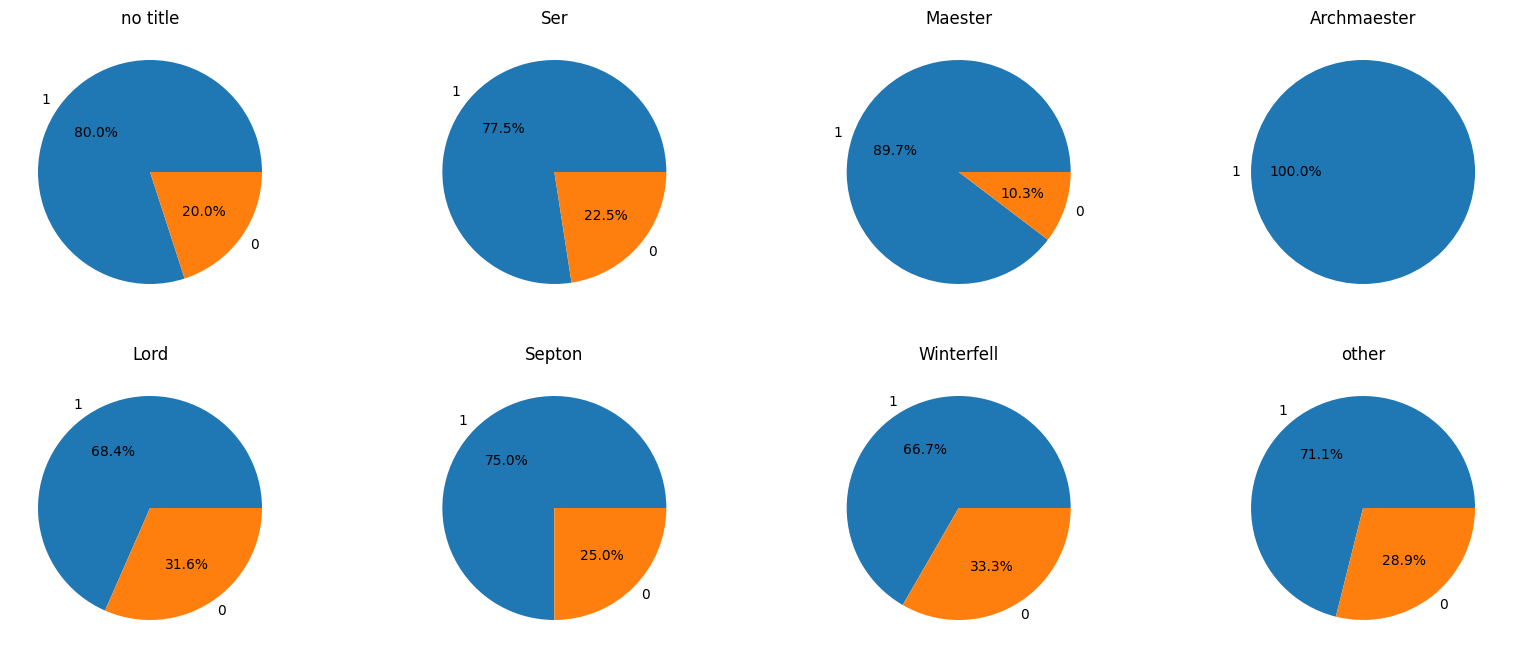

In [22]:
data1 = data_train[data_train['title'] == '']['isAlive'].value_counts()
data2 = data_train[data_train['title'] == 'Ser']['isAlive'].value_counts()
data3 = data_train[data_train['title'] == 'Maester']['isAlive'].value_counts()
data4 = data_train[data_train['title'] == 'Archmaester']['isAlive'].value_counts()
data5 = data_train[data_train['title'] == 'Lord']['isAlive'].value_counts()
data6 = data_train[data_train['title'] == 'Septon']['isAlive'].value_counts()
data7 = data_train[data_train['title'] == 'Winterfell']['isAlive'].value_counts()
data8 = data_train[data_train['title'] == 'other']['isAlive'].value_counts()

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%')
ax7.pie(data7.values, labels=data7.index, autopct='%1.1f%%')
ax8.pie(data8.values, labels=data8.index, autopct='%1.1f%%')

ax1.set_title("no title")
ax2.set_title("Ser")
ax3.set_title("Maester")
ax4.set_title("Archmaester")
ax5.set_title("Lord")
ax6.set_title("Septon")
ax7.set_title("Winterfell")
ax8.set_title("other")

plt.show()

In [23]:
# Среди большинства титулов распределение живых и мертвых примерно одинаково за исключением Maester и Archmaester

Пол:

In [24]:
data_train['male'].value_counts()

,count
male,
1,920
0,637


In [25]:
# Данный признак относительно не плохо сбалансирова

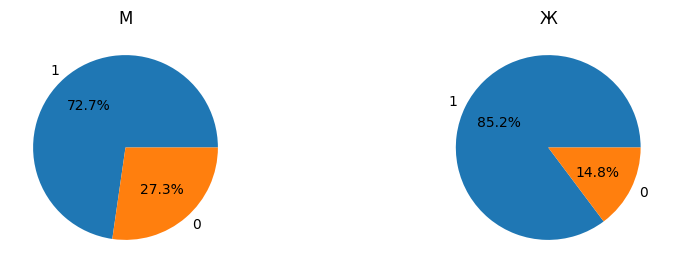

In [26]:
data1 = data_train[data_train['male'] == 1]['isAlive'].value_counts()
data2 = data_train[data_train['male'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("М")
ax2.set_title("Ж")

plt.show()

In [27]:
# Среди женщин доля живых больше

Культура:

In [28]:
data_train['culture'].value_counts()

,count
culture,
,1069
Northmen,103
Ironborn,92
Free Folk,56
Braavosi,40
Valyrian,28
Dornish,21
Ghiscari,18
Dothraki,17


In [29]:
# Для лучшей сбалансированности данного признака объединим все значения, которые встречаются меньше 1 раза

In [30]:
data_train.loc[~(data_train['culture'].isin(data_train['culture'].value_counts()[(data_train['culture'].value_counts() >= 10)].index)), 'culture'] = ''
data_test.loc[~(data_test['culture'].isin(data_train['culture'].value_counts()[(data_train['culture'].value_counts() >= 10)].index)), 'culture'] = ''

In [31]:
data_train['culture'].value_counts()

,count
culture,
,1122
Northmen,103
Ironborn,92
Free Folk,56
Braavosi,40
Valyrian,28
Dornish,21
Ghiscari,18
Dothraki,17


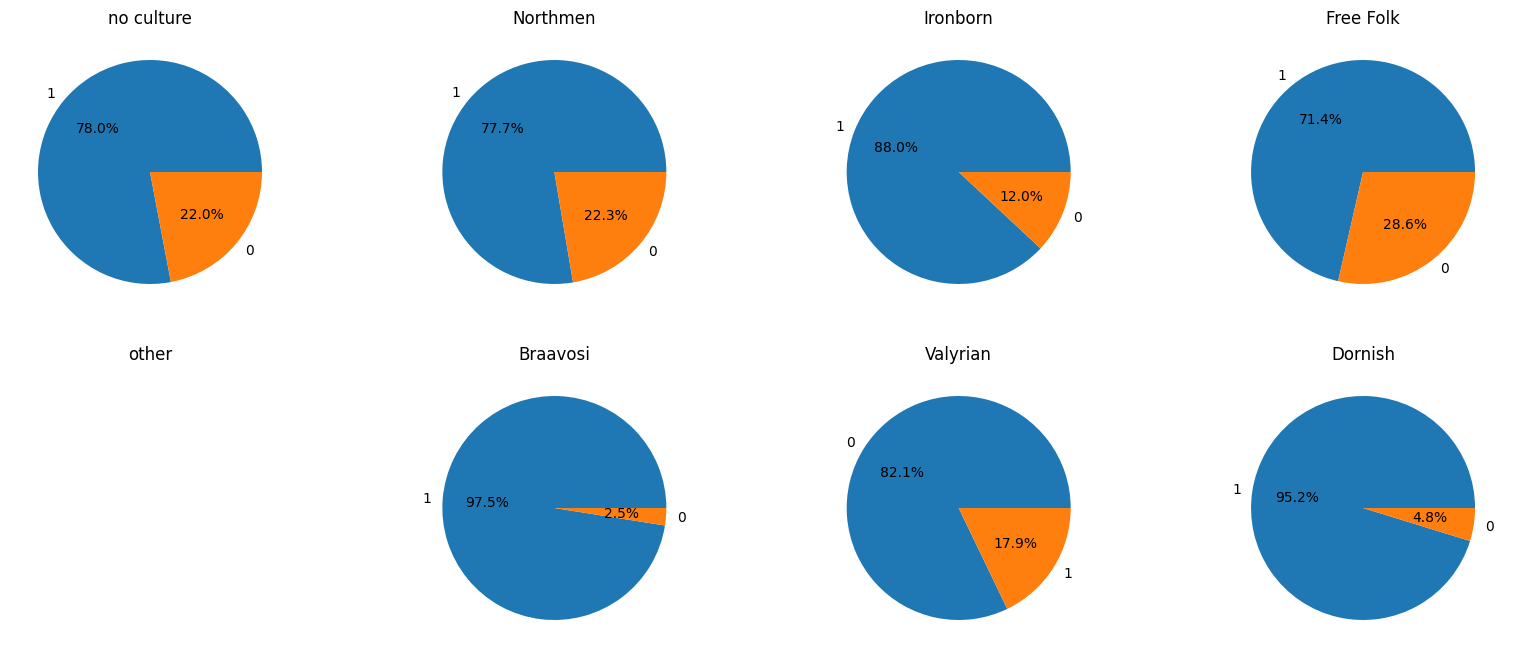

In [32]:
data1 = data_train[data_train['culture'] == '']['isAlive'].value_counts()
data2 = data_train[data_train['culture'] == 'Northmen']['isAlive'].value_counts()
data3 = data_train[data_train['culture'] == 'Ironborn']['isAlive'].value_counts()
data4 = data_train[data_train['culture'] == 'Free Folk']['isAlive'].value_counts()
data5 = data_train[data_train['culture'] == 'other']['isAlive'].value_counts()
data6 = data_train[data_train['culture'] == 'Braavosi']['isAlive'].value_counts()
data7 = data_train[data_train['culture'] == 'Valyrian']['isAlive'].value_counts()
data8 = data_train[data_train['culture'] == 'Dornish']['isAlive'].value_counts()

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%')
ax7.pie(data7.values, labels=data7.index, autopct='%1.1f%%')
ax8.pie(data8.values, labels=data8.index, autopct='%1.1f%%')

ax1.set_title("no culture")
ax2.set_title("Northmen")
ax3.set_title("Ironborn")
ax4.set_title("Free Folk")
ax5.set_title("other")
ax6.set_title("Braavosi")
ax7.set_title("Valyrian")
ax8.set_title("Dornish")

plt.show()

In [33]:
# Видно, что данный признак влияет на целевой

In [34]:
data_train['house'].value_counts()

,count
house,
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
...,...
House Celtigar,1
House of Ghazeen,1
House Byrch,1


In [35]:
# Поступим аналогично предыдущим случаям и объединим все значения которые встречаются меньше 10 раз

In [36]:
data_train.loc[~(data_train['house'].isin(data_train['house'].value_counts()[(data_train['house'].value_counts() >= 10)].index)), 'house'] = 'other'
data_test.loc[~(data_test['house'].isin(data_train['house'].value_counts()[(data_train['house'].value_counts() >= 10)].index)), 'house'] = 'other'

In [37]:
data_train['house'].value_counts()

,count
house,
other,1084
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Tyrell,33
House Greyjoy,30
House Osgrey,20


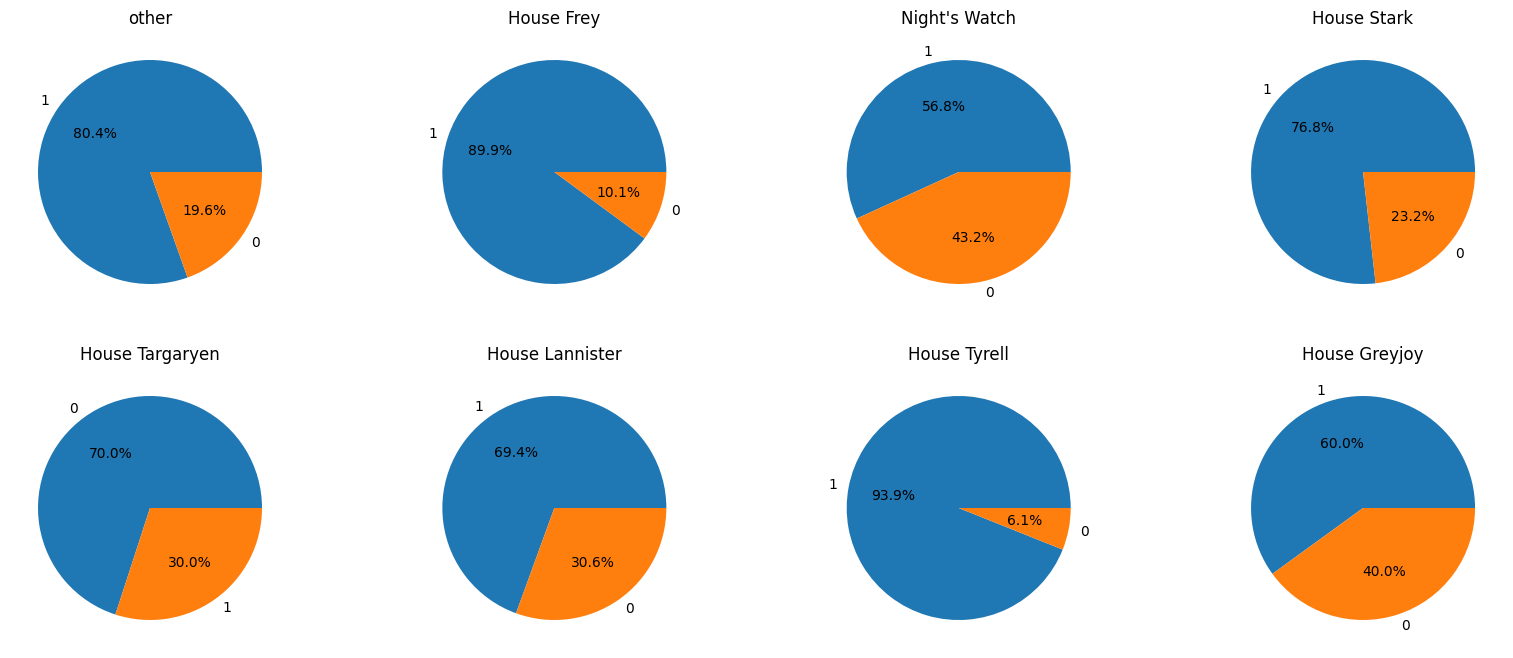

In [38]:
data1 = data_train[data_train['house'] == 'other']['isAlive'].value_counts()
data2 = data_train[data_train['house'] == 'House Frey']['isAlive'].value_counts()
data3 = data_train[data_train['house'] == 'Night\'s Watch']['isAlive'].value_counts()
data4 = data_train[data_train['house'] == 'House Stark']['isAlive'].value_counts()
data5 = data_train[data_train['house'] == 'House Targaryen']['isAlive'].value_counts()
data6 = data_train[data_train['house'] == 'House Lannister']['isAlive'].value_counts()
data7 = data_train[data_train['house'] == 'House Tyrell']['isAlive'].value_counts()
data8 = data_train[data_train['house'] == 'House Greyjoy']['isAlive'].value_counts()

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%')
ax7.pie(data7.values, labels=data7.index, autopct='%1.1f%%')
ax8.pie(data8.values, labels=data8.index, autopct='%1.1f%%')

ax1.set_title("other")
ax2.set_title("House Frey")
ax3.set_title("Night\'s Watch")
ax4.set_title("House Stark")
ax5.set_title("House Targaryen")
ax6.set_title("House Lannister")
ax7.set_title("House Tyrell")
ax8.set_title("House Greyjoy")

plt.show()

Имя супруги

In [39]:
data_train['spouse'].value_counts()

,count
spouse,
,1357
Walder Frey,6
Craster,4
Viserys I Targaryen,2
Kiera of Tyrosh,2
...,...
Hosteen Frey,1
Jyanna Frey,1
Leobald Tallhart,1


In [40]:
# Врятли значения которые встречаются один раз можно считать важными

In [41]:
data_train.loc[~(data_train['spouse'].isin(data_train['spouse'].value_counts()[(data_train['spouse'].value_counts() != 1)].index)), 'spouse'] = ''
data_test.loc[~(data_test['spouse'].isin(data_train['spouse'].value_counts()[(data_train['spouse'].value_counts() != 1)].index)), 'spouse'] = ''

In [42]:
data_train['spouse'].value_counts()

,count
spouse,
,1535
Walder Frey,6
Craster,4
Viserys I Targaryen,2
Kiera of Tyrosh,2
Alys Arryn,2
Stevron Frey,2
Amerei Frey,2
Rohanne Webber,2


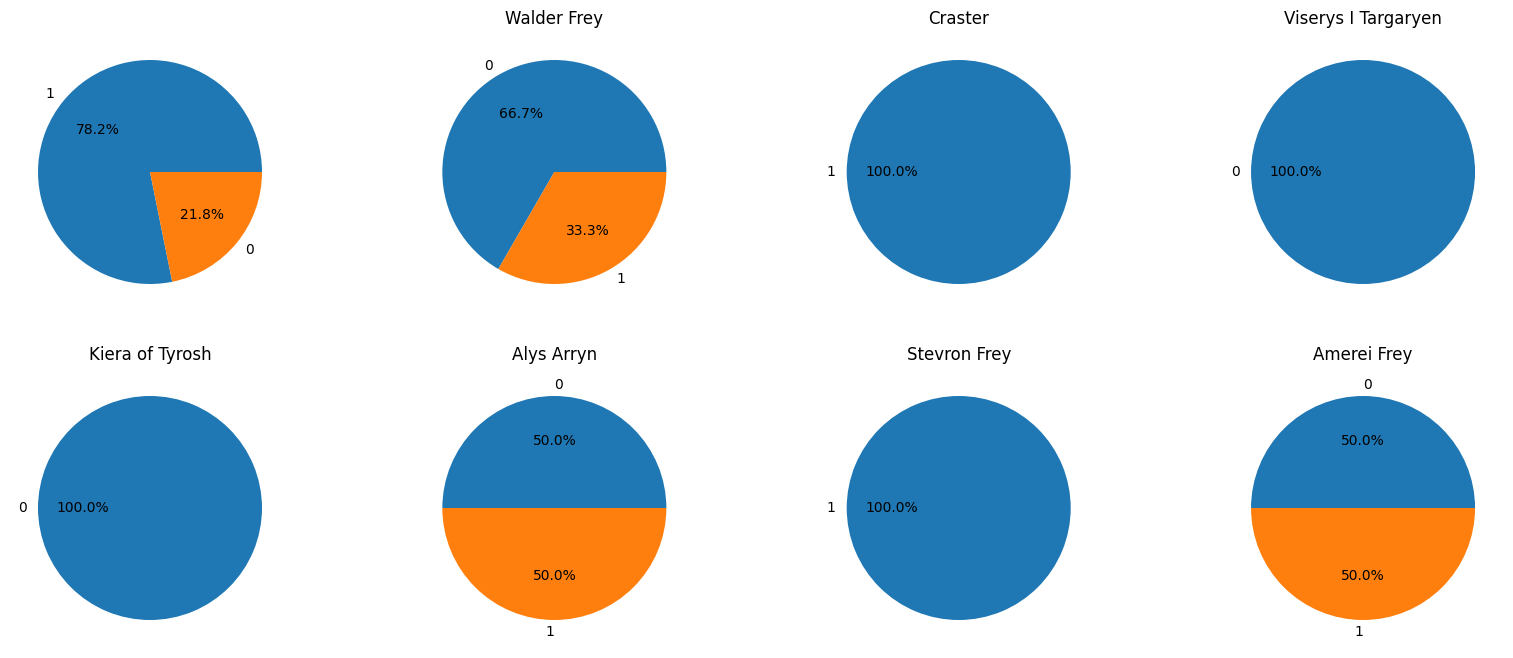

In [43]:
data1 = data_train[data_train['spouse'] == '']['isAlive'].value_counts()
data2 = data_train[data_train['spouse'] == 'Walder Frey']['isAlive'].value_counts()
data3 = data_train[data_train['spouse'] == 'Craster']['isAlive'].value_counts()
data4 = data_train[data_train['spouse'] == 'Viserys I Targaryen']['isAlive'].value_counts()
data5 = data_train[data_train['spouse'] == 'Kiera of Tyrosh']['isAlive'].value_counts()
data6 = data_train[data_train['spouse'] == 'Alys Arryn']['isAlive'].value_counts()
data7 = data_train[data_train['spouse'] == 'Stevron Frey']['isAlive'].value_counts()
data8 = data_train[data_train['spouse'] == 'Amerei Frey']['isAlive'].value_counts()

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%')
ax7.pie(data7.values, labels=data7.index, autopct='%1.1f%%')
ax8.pie(data8.values, labels=data8.index, autopct='%1.1f%%')

ax1.set_title("")
ax2.set_title("Walder Frey")
ax3.set_title("Craster")
ax4.set_title("Viserys I Targaryen")
ax5.set_title("Kiera of Tyrosh")
ax6.set_title("Alys Arryn")
ax7.set_title("Stevron Frey")
ax8.set_title("Amerei Frey")

plt.show()

Посмотрим на влияние книги:

In [44]:
print("Число персонажей в зависимости от книги")
print(f'Книга 1 - {(data_train["book1"] == 1).sum()}')
print(f'Книга 2 - {(data_train["book2"] == 1).sum()}')
print(f'Книга 3 - {(data_train["book3"] == 1).sum()}')
print(f'Книга 4 - {(data_train["book4"] == 1).sum()}')
print(f'Книга 5 - {(data_train["book5"] == 1).sum()}')

Число персонажей в зависимости от книги
Книга 1 - 216
Книга 2 - 510
Книга 3 - 672
Книга 4 - 876
Книга 5 - 514


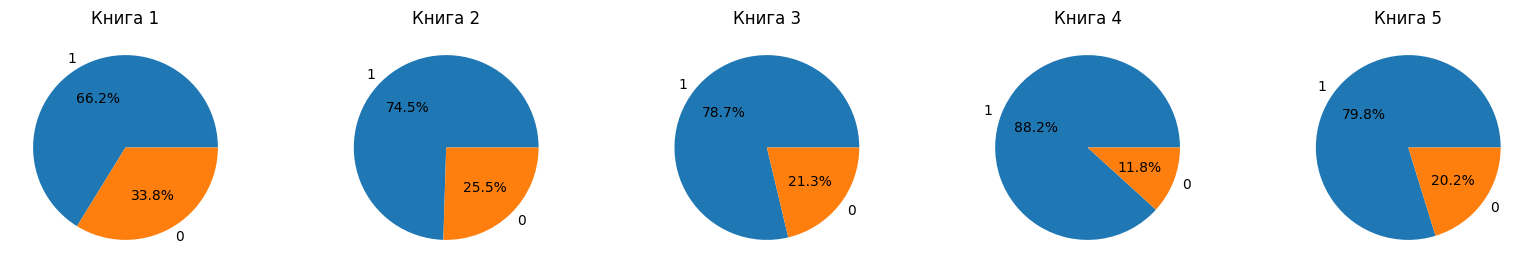

In [45]:
data1 = data_train[data_train['book1'] == 1]['isAlive'].value_counts()
data2 = data_train[data_train['book2'] == 1]['isAlive'].value_counts()
data3 = data_train[data_train['book3'] == 1]['isAlive'].value_counts()
data4 = data_train[data_train['book4'] == 1]['isAlive'].value_counts()
data5 = data_train[data_train['book5'] == 1]['isAlive'].value_counts()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,3))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')

ax1.set_title("Книга 1")
ax2.set_title("Книга 2")
ax3.set_title("Книга 3")
ax4.set_title("Книга 4")
ax5.set_title("Книга 5")

plt.show()

In [46]:
# Явной зависимости от книги не видно

Жив ли супруг персонажа  
Женат/замужем персонаж  
Знатность

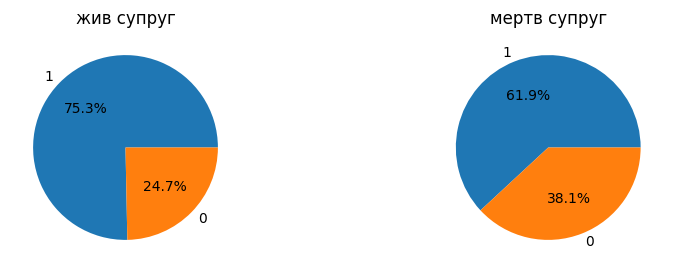

In [47]:
data1 = data_train[data_train['isAliveSpouse'] == 1]['isAlive'].value_counts()
data2 = data_train[data_train['isAliveSpouse'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("жив супруг")
ax2.set_title("мертв супруг")

plt.show()

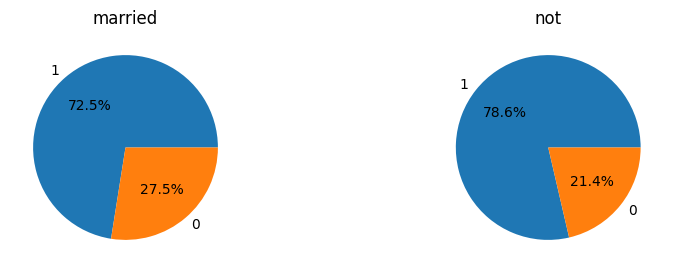

In [48]:
data1 = data_train[data_train['isMarried'] == 1]['isAlive'].value_counts()
data2 = data_train[data_train['isMarried'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("married")
ax2.set_title("not")

plt.show()

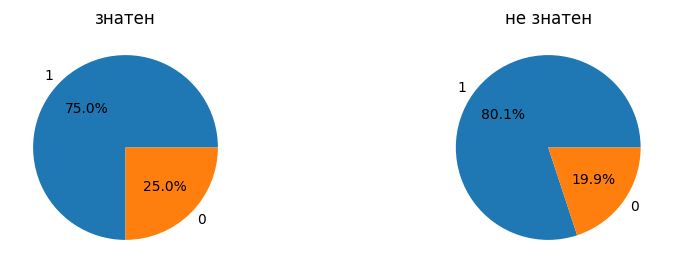

In [49]:
data1 = data_train[data_train['isNoble'] == 1]['isAlive'].value_counts()
data2 = data_train[data_train['isNoble'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("знатен")
ax2.set_title("не знатен")

plt.show()

Переведем категориальные признаки в числа

In [50]:
unprocessed_cat_features = ['title', 'culture', 'house', 'spouse']

from sklearn.preprocessing import OneHotEncoder
data_train_encoder = OneHotEncoder(sparse_output=False)
data_train_one_hot_encoded = data_train_encoder.fit_transform(data_train[unprocessed_cat_features])

one_hot_data_train = pd.DataFrame(
    data_train_one_hot_encoded,
    columns=data_train_encoder.get_feature_names_out(unprocessed_cat_features),
    index=data_train.index)

data_train_encoded = pd.concat([data_train, one_hot_data_train], axis=1)
data_train_encoded = data_train_encoded.drop(unprocessed_cat_features, axis=1)
# data_train_encoded.info()

In [51]:
data_test_one_hot_encoded = data_train_encoder.transform(data_test[unprocessed_cat_features])

one_hot_data_test = pd.DataFrame(
    data_test_one_hot_encoded,
    columns=data_train_encoder.get_feature_names_out(unprocessed_cat_features),
    index=data_test.index)

data_test_encoded = pd.concat([data_test, one_hot_data_test], axis=1)
data_test_encoded = data_test_encoded.drop(unprocessed_cat_features, axis=1)

Количественные признаки:

In [52]:
data_train.columns

Index(['title', 'male', 'culture', 'house', 'spouse', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveSpouse', 'isMarried', 'isNoble',
       'age', 'numDeadRelations', 'popularity', 'isAlive', 'ageIsNa',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

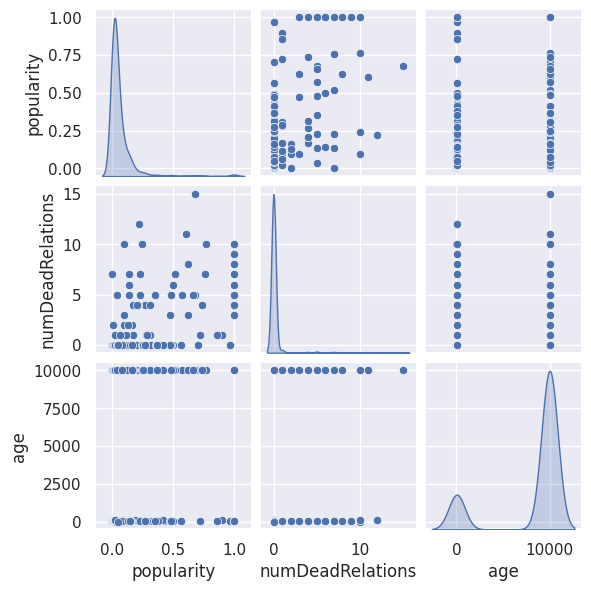

In [53]:
sns.set()
sns.pairplot(data_train[['popularity', 'numDeadRelations', 'age']], height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

In [54]:
# количественных признаки не коррелируют друг с другом

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [55]:
# качественные признаки см. задание 1.7

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


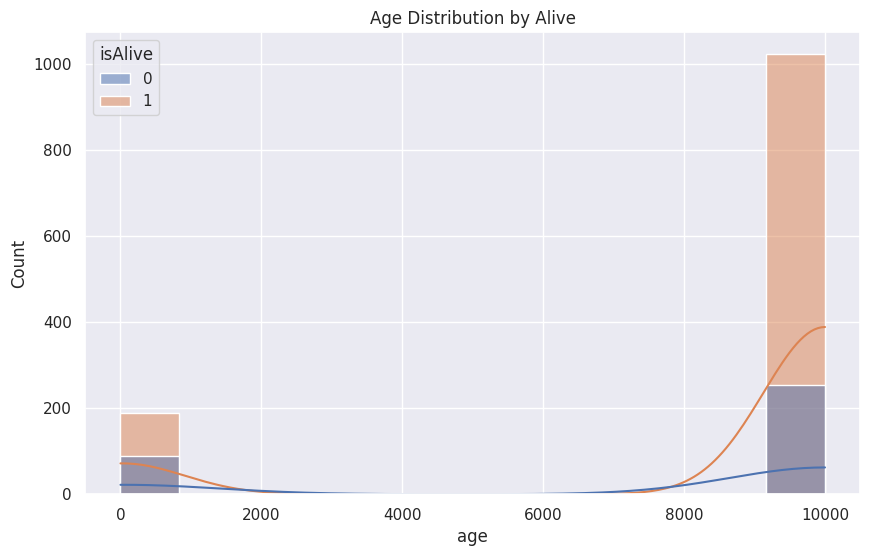

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='age', kde=True, hue='isAlive')
plt.title('Age Distribution by Alive')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


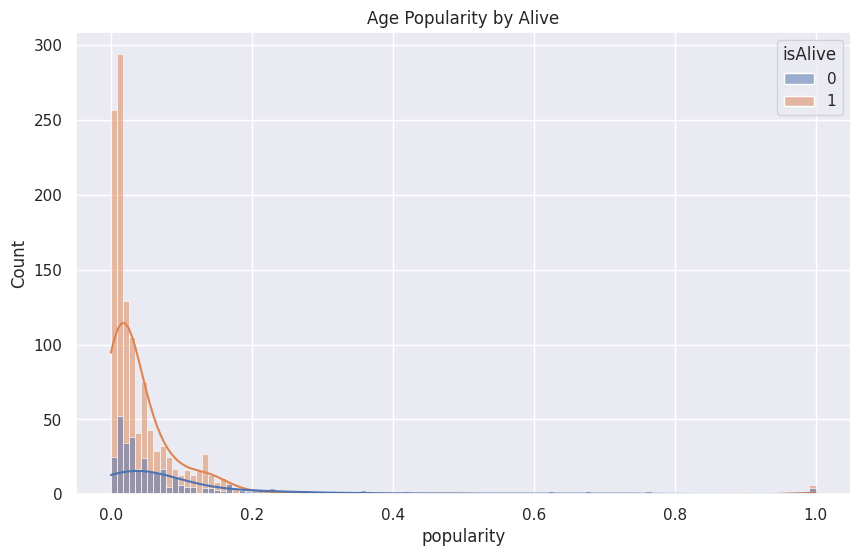

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='popularity', kde=True, hue='isAlive')
plt.title('Age Popularity by Alive')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


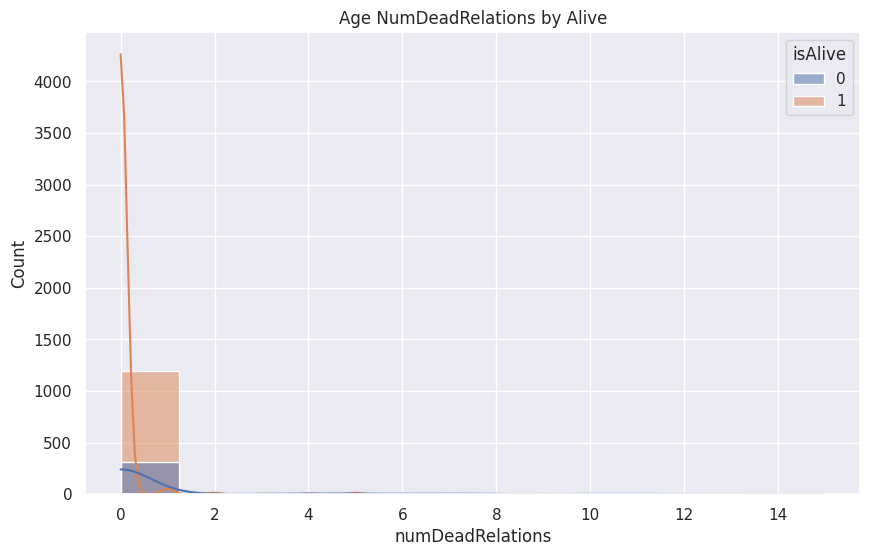

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='numDeadRelations', kde=True, hue='isAlive')
plt.title('Age NumDeadRelations by Alive')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [59]:
data_train.columns

Index(['title', 'male', 'culture', 'house', 'spouse', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveSpouse', 'isMarried', 'isNoble',
       'age', 'numDeadRelations', 'popularity', 'isAlive', 'ageIsNa',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

In [60]:
# X = data_train_encoded.drop(['isAlive', 'popularity', 'numDeadRelations'], axis=1)
X = data_train_encoded.drop(['isAlive', 'isPopular', 'boolDeadRelations'], axis=1)
y = data_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [63]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [64]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [65]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_LR = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [66]:
# Шаг 1. создание модели
ab_clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)

# Шаг 2. обучение модели
ab_clf.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ABC = ab_clf.predict(X_test)

In [67]:
rf_clf = RandomForestClassifier(max_depth=12, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_RF = rf_clf.predict(X_test)

In [68]:
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gp_clf = GaussianProcessClassifier(
    kernel=kernel,
    random_state=0).fit(X_train, y_train)
y_pred_GP = gp_clf.predict(X_test)

In [69]:
gnb_clf = GaussianNB().fit(X_train, y_train)
y_pred_GNB = gnb_clf.predict(X_test)

In [70]:
kn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_KN = kn_clf.predict(X_test)

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
y_pred_SVC = svc_clf.predict(X_test)

In [72]:
dt_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_DT = dt_clf.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [73]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [74]:
# Шаг 3. Предсказание на тестовых данных
# y_pred_LR = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_LR)
print("Accuracy LR: %.4f" % accuracy)

Accuracy LR: 0.8173


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [75]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_ABC)
print("Accuracy ABC: %.4f" % accuracy)

Accuracy ABC: 0.8269


In [76]:
accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy RF: %.4f" % accuracy)

Accuracy RF: 0.8429


In [77]:
accuracy = accuracy_score(y_test, y_pred_GP)
print("Accuracy GP: %.4f" % accuracy)

Accuracy GP: 0.8237


In [78]:
accuracy = accuracy_score(y_test, y_pred_GNB)
print("Accuracy GNB: %.4f" % accuracy)

Accuracy GNB: 0.8045


In [79]:
accuracy = accuracy_score(y_test, y_pred_KN)
print("Accuracy KN: %.4f" % accuracy)

Accuracy KN: 0.8013


In [80]:
accuracy = accuracy_score(y_test, y_pred_SVC)
print("Accuracy SVC: %.4f" % accuracy)

Accuracy SVC: 0.8141


In [81]:
accuracy = accuracy_score(y_test, y_pred_DT)
print("Accuracy DT: %.4f" % accuracy)

Accuracy DT: 0.7917


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [82]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 13.0MB/s]


In [83]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [84]:
# X_sub = data_test_encoded.drop(['popularity', 'numDeadRelations'], axis=1).values
X_sub = data_test_encoded.drop(['isPopular', 'boolDeadRelations'], axis=1).values

In [85]:
# submission['isAlive'] = gp_clf.predict(X_sub)
submission['isAlive'] = ab_clf.predict(X_sub)

In [86]:
submission.to_csv('res_ab.csv')

Как сохранить измененный Pandas DataFrame в csv файл:

In [87]:
submission.to_csv("/content/new_submission.csv", index=False)